In [2]:
import math

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

In [3]:
df = pd.read_csv('../data/train.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

Evidence: we have 90_000 rows and there is no missing values

In [73]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


In [74]:
df['8'].value_counts()

8
0    45073
1    44927
Name: count, dtype: int64

Evidences:
1. Features have positive values, except of feature 6.
2. Features have different value ranges: 0-1, 0-15, 0-499
3. Features have uniform distribution, except of feature 6
4. Feature 6 has values distributed symmetrically from both sides of 0.
5. Feature 8 is a binary feature
6. Target has a range 0-100 with uniform distribution. All target values > 0, so we can try to restrict the model to predict only positive values.

Hypotheses:
1. Likely, there are a lot non-informative features
2. Despite distribution is uniform by quantiles, there still could be distribution peculiarities

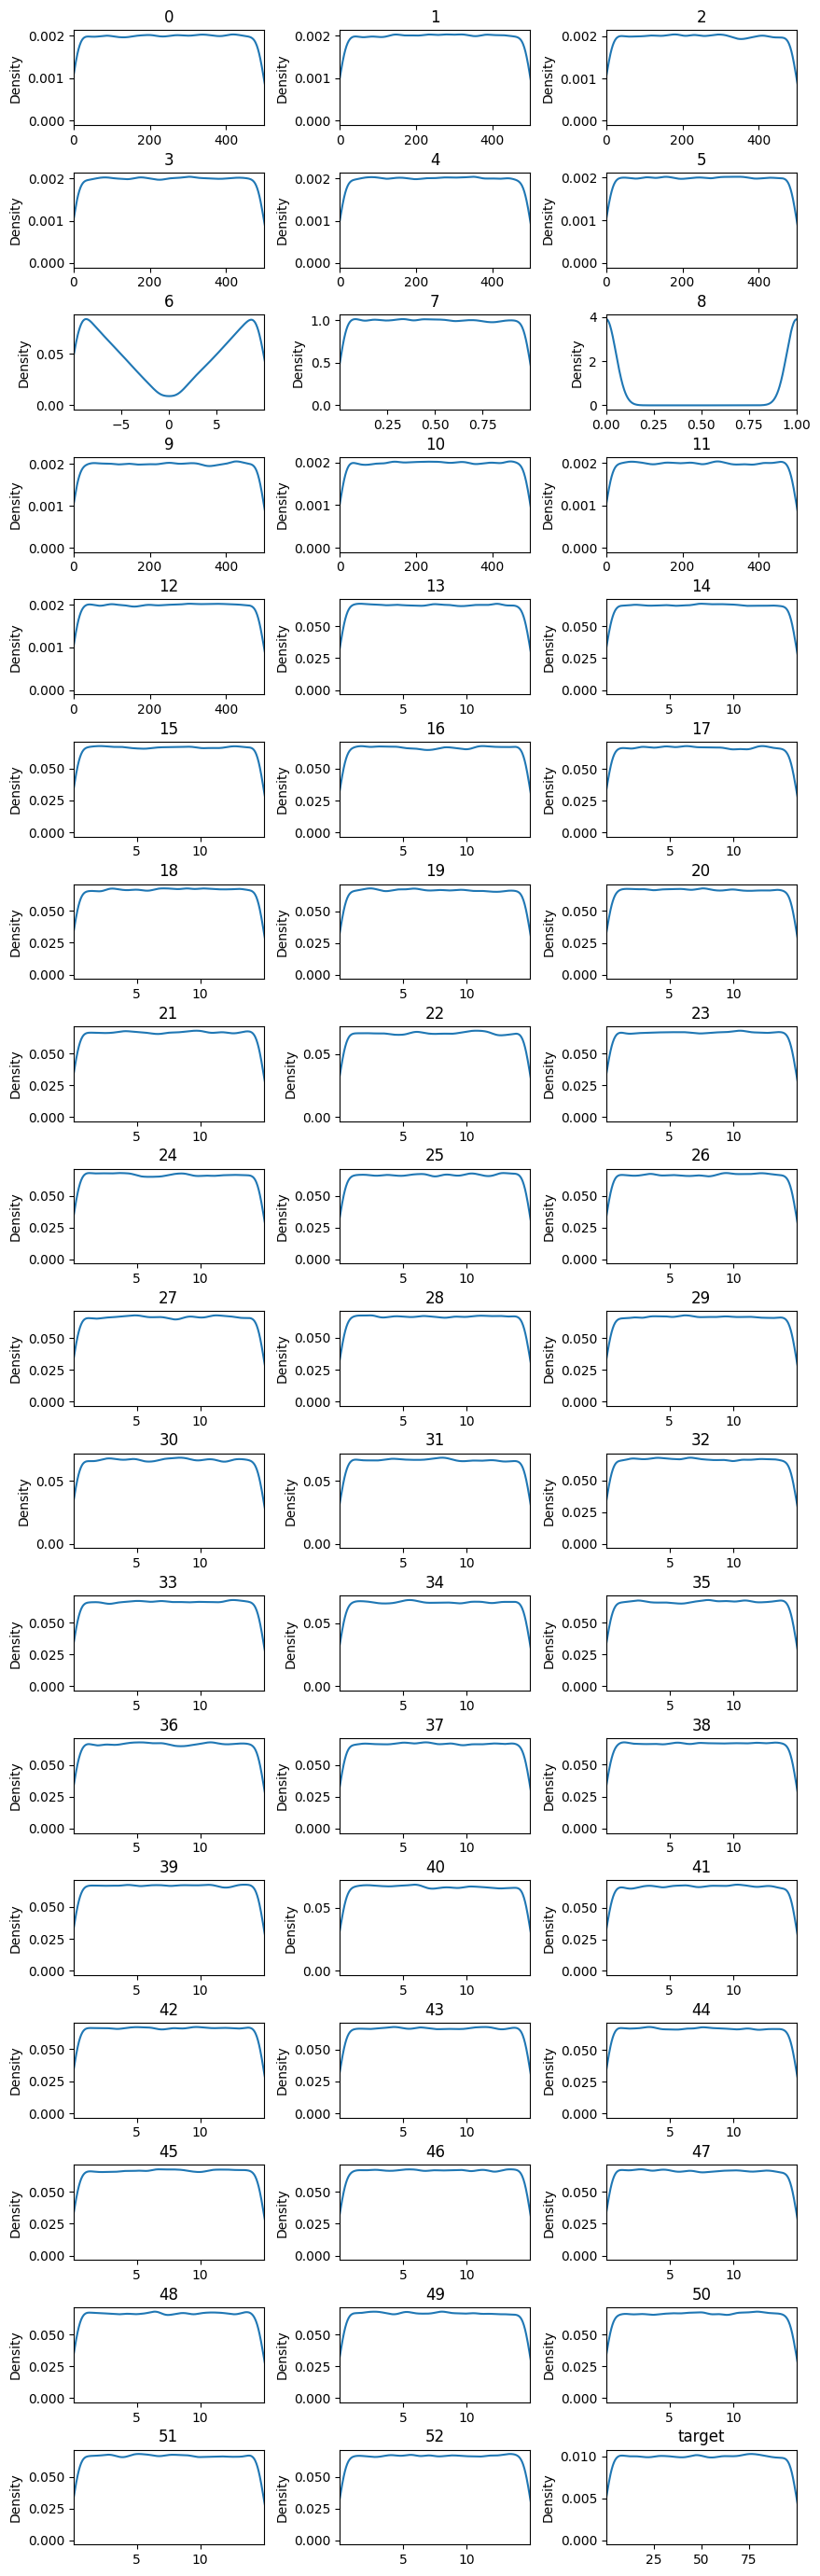

In [85]:
columns = 3
rows = math.ceil(df.shape[1] / columns)
fig, ax_list = plt.subplots(rows, columns, gridspec_kw={'wspace': 0.4, 'hspace': 0.5})
fig.set_size_inches(10, 35)
for idx, column_name in enumerate(df.columns):
    data = df[column_name]
    ax = ax_list[idx // columns, idx % columns]
    ax.set_xlim([data.min(), data.max()])
    data.plot.density(ax=ax, title=column_name)

plt.show()

Evidence: all features have uniform distribution without any significant anomalies (except of feature 6)

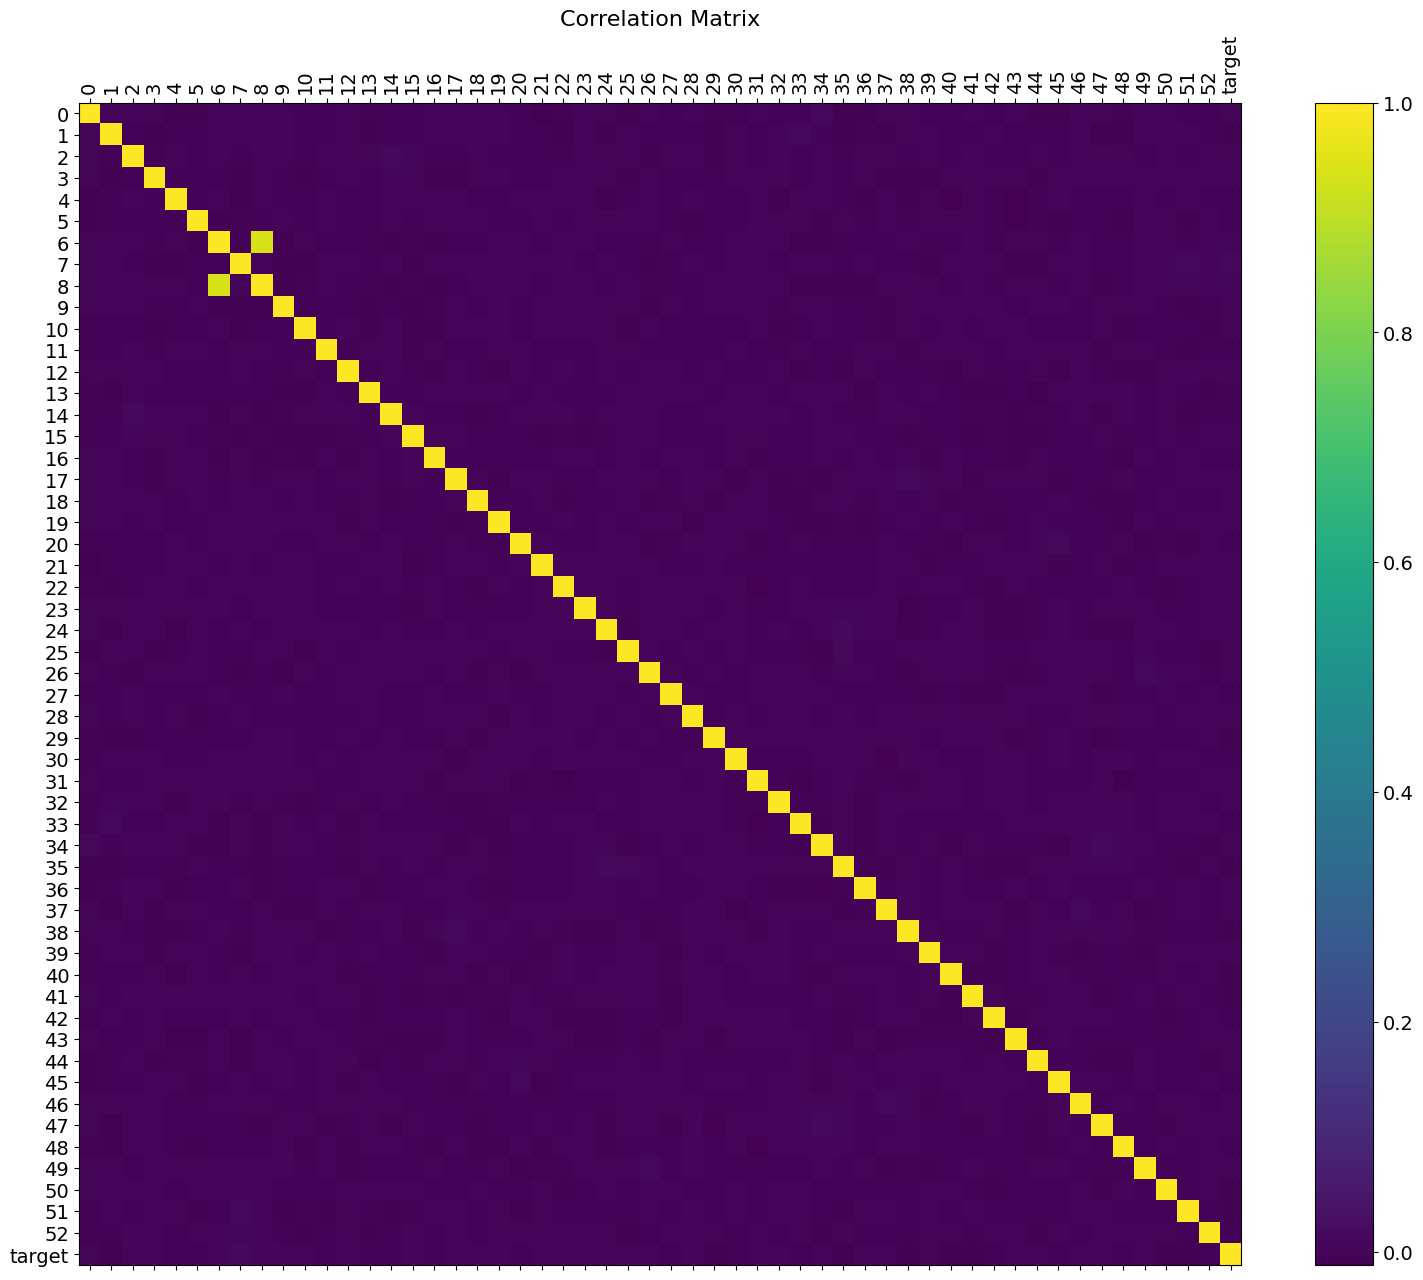

In [76]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14, rotation=0)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

Evidences: 
1. features 6 and 8 correlates a lot
2. There is no powerful linear correlation between any feature and target -> linear models will not work well


Evidence: stratification is almost uniform

Note: we have large enough dataset, so we can avoid cross-validation usage and can use simple train-val split 

# Create dataset for feature selection

In [4]:
stratification = df.target.astype(int)
counts = stratification.value_counts()
counts.min(), counts.max()

(831, 985)

Evidence: rows stratified almost equally

In [5]:
df_train_indices, df_val_indices = train_test_split(range(df.shape[0]), 
                                                    test_size=0.2, random_state=42, stratify=stratification)
df_train = df.iloc[df_train_indices]
df_val = df.iloc[df_val_indices]
len(df_train), len(df_val)

(72000, 18000)

In [6]:
y_train = df_train.target.to_numpy()
y_val = df_val.target.to_numpy()

scaler = MinMaxScaler()
X_train = scaler.fit_transform(df_train.iloc[:, :-1])
X_val = scaler.transform(df_val.iloc[:, :-1])

In [7]:
# sample train set to increase model fit speed
stratification_train = stratification[df_train_indices]
train_short_indices, _ = train_test_split(range(X_train.shape[0]), train_size=0.1, random_state=42, stratify=stratification_train)
X_train_short = X_train[train_short_indices]
y_train_short = y_train[train_short_indices]
len(X_train_short), len(y_train_short)

(7200, 7200)

# Perform feature selection

In [8]:
feature_selector = RandomForestRegressor(n_jobs=-1, random_state=42)
feature_selector.fit(X_train_short, y_train_short)
feature_selector.feature_importances_

array([1.17328702e-07, 1.27704892e-07, 1.11070562e-07, 1.09418198e-07,
       1.13542109e-07, 1.11643309e-07, 9.99905760e-01, 8.82266071e-05,
       1.13097275e-10, 1.19873344e-07, 1.11549312e-07, 1.15265105e-07,
       1.26771893e-07, 1.34985169e-07, 1.27735536e-07, 1.17190132e-07,
       1.21475122e-07, 1.31739863e-07, 1.09640671e-07, 1.17278035e-07,
       1.25640614e-07, 1.16075697e-07, 1.15962210e-07, 1.24773740e-07,
       1.14644804e-07, 1.24804328e-07, 1.22380473e-07, 1.12052102e-07,
       1.10942688e-07, 1.31225857e-07, 1.39410331e-07, 1.19905281e-07,
       1.14357475e-07, 1.25338916e-07, 1.28891353e-07, 1.15806487e-07,
       1.27609801e-07, 1.25537096e-07, 1.06188772e-07, 1.25320424e-07,
       1.30117334e-07, 1.44363878e-07, 1.06441684e-07, 1.21225414e-07,
       1.00748881e-07, 1.12204889e-07, 1.28312524e-07, 1.19516285e-07,
       9.99565632e-08, 1.38704265e-07, 1.16739996e-07, 1.27621712e-07,
       1.15855864e-07])

Evidence: all features insignificant, except of features 6 and 7

# Create dataset for model selection 

In [9]:
target_features = [6, 7]

X_train_selected = X_train[:, target_features]
X_train_short_selected = X_train_short[:, target_features]
X_val_selected = X_val[:, target_features]

# Verify feature selection was successful

In [41]:
# Train on SUBSET data with ALL features 
feature_selector.fit(X_train_short, y_train_short)
prediction = feature_selector.predict(X_val)
rmse = root_mean_squared_error(y_val, prediction)
rmse

0.05884922250937186

In [42]:
# Train on SUBSET data with SELECTED features 
feature_selector.fit(X_train_short_selected, y_train_short)
prediction = feature_selector.predict(X_val_selected)
rmse = root_mean_squared_error(y_val, prediction)
rmse

0.018096551368334695

Evidence: feature selection improved the result

# Select model parameters

In [22]:
model1 = SVR(C=1500)  # best score: -0.06413241
model2 = RandomForestRegressor(n_jobs=-1, random_state=42, n_estimators=1000, max_depth=50)  # best score: -0.02483621

In [23]:
cv = GridSearchCV(
    estimator=model1,
    param_grid={
        'C': [1500]
    },
    n_jobs=-1, 
    cv=5,
    verbose=3,
    error_score='raise',
    return_train_score=True,
    scoring='neg_root_mean_squared_error'
)
cv.fit(X_train_short_selected, y_train_short)
cv.cv_results_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


{'mean_fit_time': array([2.68244529]),
 'std_fit_time': array([0.13920939]),
 'mean_score_time': array([0.00453658]),
 'std_score_time': array([0.00036654]),
 'param_C': masked_array(data=[1500],
              mask=[False],
        fill_value=999999),
 'params': [{'C': 1500}],
 'split0_test_score': array([-0.06353742]),
 'split1_test_score': array([-0.06392838]),
 'split2_test_score': array([-0.06492254]),
 'split3_test_score': array([-0.0645132]),
 'split4_test_score': array([-0.06376049]),
 'mean_test_score': array([-0.06413241]),
 'std_test_score': array([0.00051054]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([-0.06390877]),
 'split1_train_score': array([-0.06387173]),
 'split2_train_score': array([-0.06410715]),
 'split3_train_score': array([-0.06374719]),
 'split4_train_score': array([-0.06416309]),
 'mean_train_score': array([-0.06395959]),
 'std_train_score': array([0.00015401])}

In [24]:
def train_test_full(model):
    model.fit(X_train_selected, y_train)
    prediction = model.predict(X_val_selected)
    rmse = root_mean_squared_error(y_val, prediction)
    return rmse

In [19]:
train_test_full(model1)

0.06235158637067307

In [20]:
train_test_full(model2)

0.0015971716448855752